In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load dataset
data = pd.read_csv('netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
data.shape

(8790, 10)

In [4]:
data.isnull().sum()


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
# As we dont have any null and duplicate values

In [7]:
# convert 'date_added' column to datetime format

data['date_added'] = pd.to_datetime(data['date_added'])

#show the datatype change
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [8]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Exploratory Data Analysis

In [10]:
#Check the count of type i.e movies and tv shows

counts = data['type'].value_counts()

In [11]:
counts

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

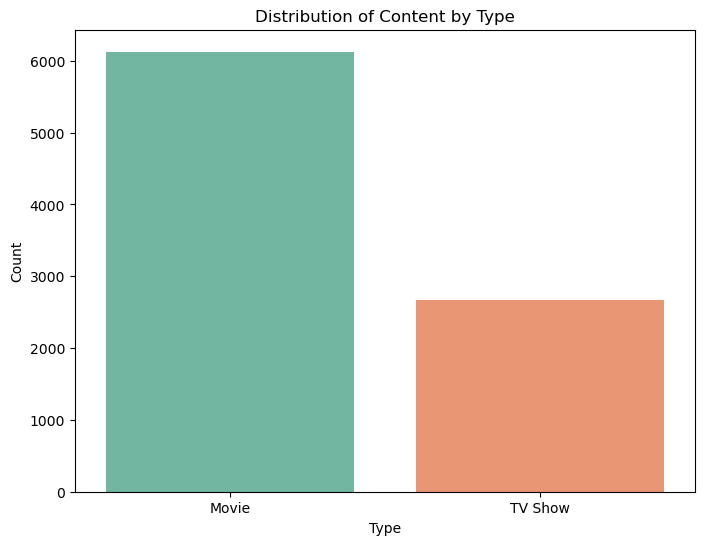

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='Set2', legend=False)
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Distribution of Content by Type")
plt.show()


In [13]:
# find out common geners
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'],[])
genre_counts = pd.Series(all_genres).value_counts().head(10)

In [14]:
# This applies a lambda function to each value in listed_in, splitting the string on commas (,) and converting it into a list of genres.

# Example: "Drama, Comedy" → ['Drama', 'Comedy']

# This converts the list of lists into a single list of genres.

# Example: [['Drama', 'Comedy'], ['Action', 'Thriller']] → ['Drama', 'Comedy', 'Action', 'Thriller']

# Converts all_genres into a Pandas Series and uses .value_counts() to count how many times each genre appears.

# .head(10) retrieves the top 10 most frequent genres.

In [15]:
data['genres']

0                                         [Documentaries]
1       [Crime TV Shows,  International TV Shows,  TV ...
2                  [TV Dramas,  TV Horror,  TV Mysteries]
3                   [Children & Family Movies,  Comedies]
4       [Dramas,  Independent Movies,  International M...
                              ...                        
8785                 [International TV Shows,  TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows,  Romantic TV Shows,  ...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: genres, Length: 8790, dtype: object

In [16]:
all_genres

['Documentaries',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'TV Dramas',
 ' TV Horror',
 ' TV Mysteries',
 'Children & Family Movies',
 ' Comedies',
 'Dramas',
 ' Independent Movies',
 ' International Movies',
 'British TV Shows',
 ' Reality TV',
 'Comedies',
 ' Dramas',
 'Children & Family Movies',
 ' Comedies',
 ' Music & Musicals',
 'Dramas',
 ' International Movies',
 'Children & Family Movies',
 ' Music & Musicals',
 'Children & Family Movies',
 ' Comedies',
 'Children & Family Movies',
 ' Comedies',
 'Dramas',
 ' International Movies',
 ' Music & Musicals',
 'Movies',
 'Movies',
 'Movies',
 'Comedies',
 'Docuseries',
 ' Reality TV',
 'British TV Shows',
 ' Crime TV Shows',
 ' Docuseries',
 'Children & Family Movies',
 "Kids' TV",
 "Kids' TV",
 "Kids' TV",
 'Children & Family Movies',
 'Crime TV Shows',
 ' International TV Shows',
 ' TV Action & Adventure',
 'Documentaries',
 ' International Movies',
 'Children & Family Movies',
 'Crime TV Shows',


In [17]:
genre_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

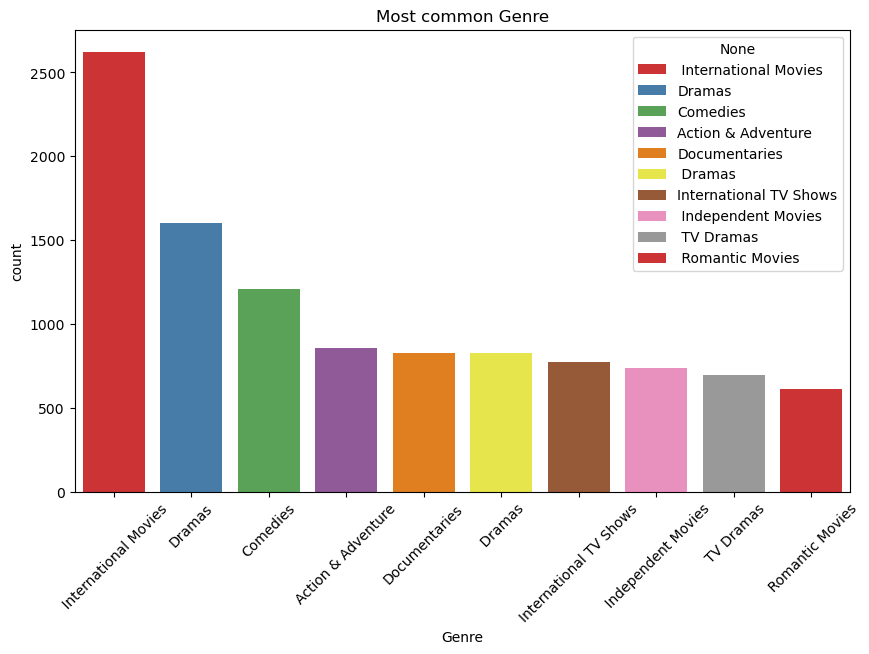

In [18]:
plt.figure(figsize = (10,6))
sns.barplot(x=genre_counts.index,y = genre_counts.values,palette = 'Set1',legend = 'full',hue = genre_counts.index)
plt.title('Most common Genre')
plt.xlabel('Genre')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [19]:
# content added over time
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
print(data['year_added'],data['month_added'])

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: year_added, Length: 8790, dtype: int32 0        9
1        9
2        9
3        9
4        9
        ..
8785     1
8786     9
8787    12
8788     6
8789     6
Name: month_added, Length: 8790, dtype: int32


C:\Users\DELL\AppData\Local\Temp\ipykernel_15288\1958753284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['year_added'],data = data,palette = 'Set1')


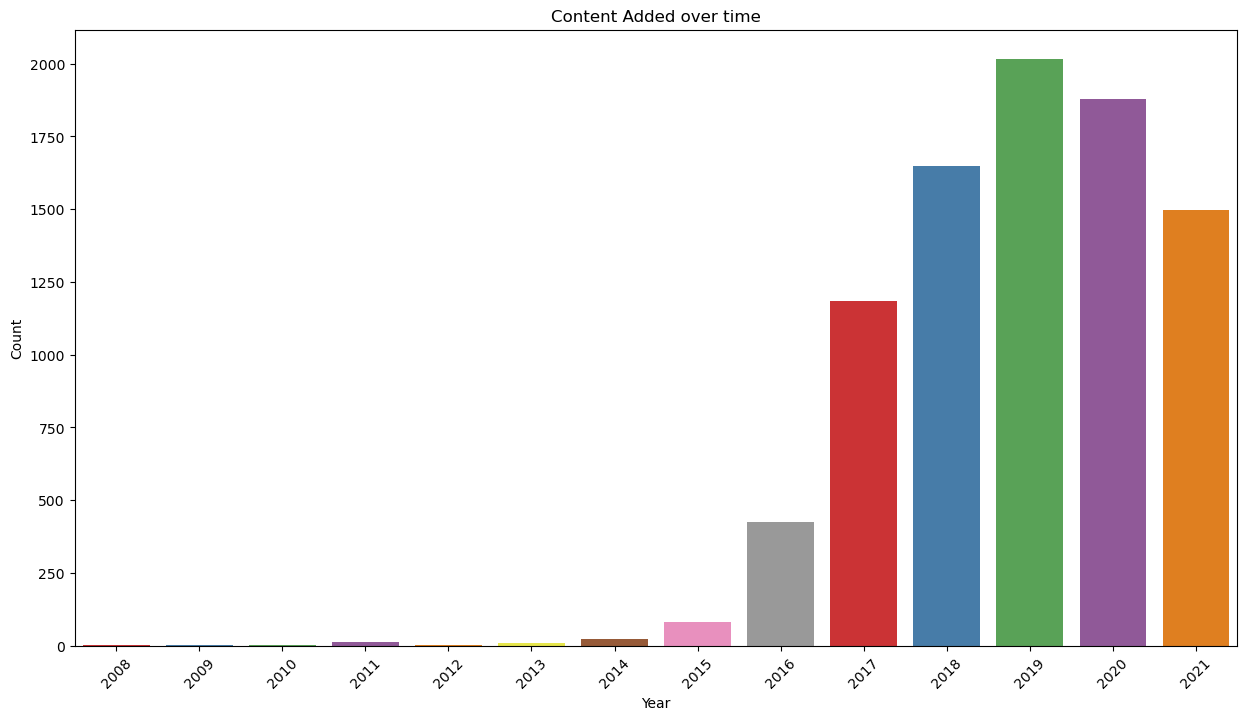

In [20]:
#plot te graph
plt.figure(figsize=(15,8))
sns.countplot(x = data['year_added'],data = data,palette = 'Set1')
plt.title('Content Added over time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [21]:
data["month"] = data["date_added"].dt.strftime("%B") 
index = data["month"].value_counts().index

C:\Users\DELL\AppData\Local\Temp\ipykernel_15288\1691396770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['month'],data = data,palette = 'Set1',order=index)


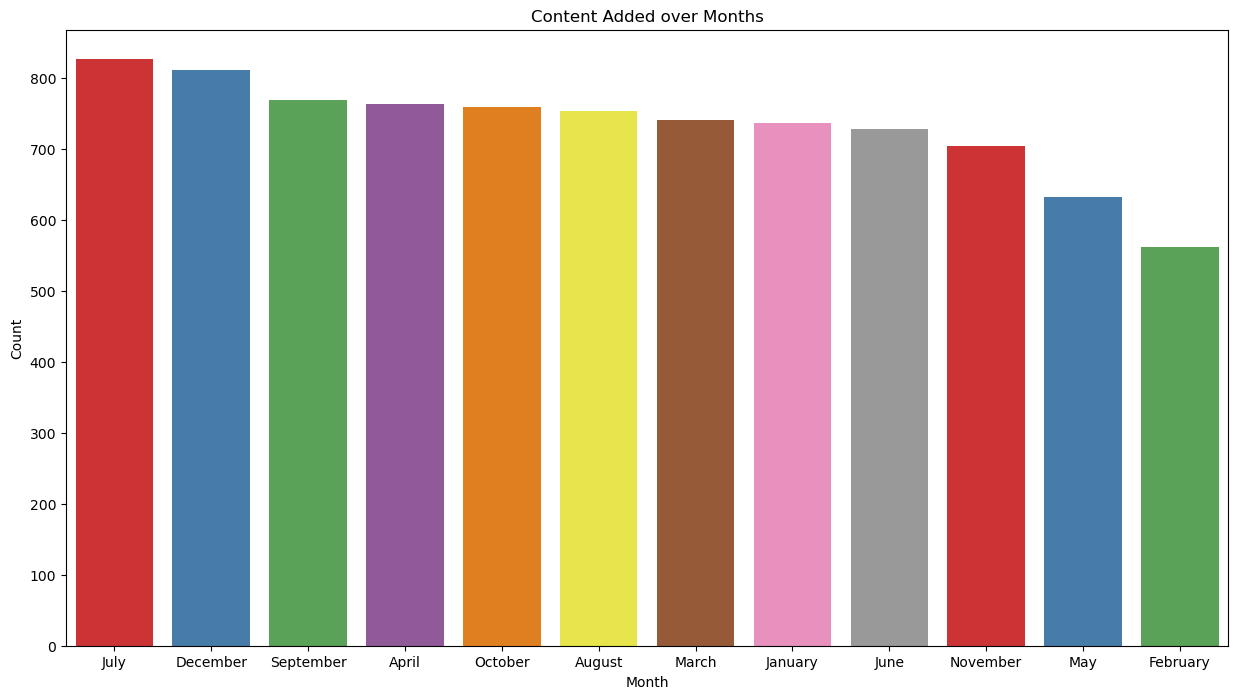

In [22]:

#plot the graph
plt.figure(figsize=(15,8))
sns.countplot(x = data['month'],data = data,palette = 'Set1',order=index)
plt.title('Content Added over Months')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

In [23]:
#findout the ratings
data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [24]:
ratings =data['rating'].value_counts().reset_index().sort_values(by='count',ascending = False)

In [25]:
ratings

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


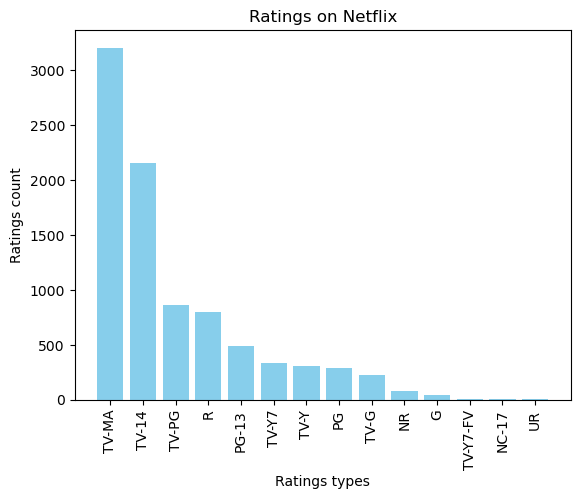

In [26]:
plt.bar(ratings['rating'],ratings['count'],color ='skyblue')
plt.xticks(rotation=90)
plt.title('Ratings on Netflix')
plt.xlabel('Ratings types')
plt.ylabel('Ratings count')
plt.show()

Text(0.5, 1.0, '% of Top Type ratings')

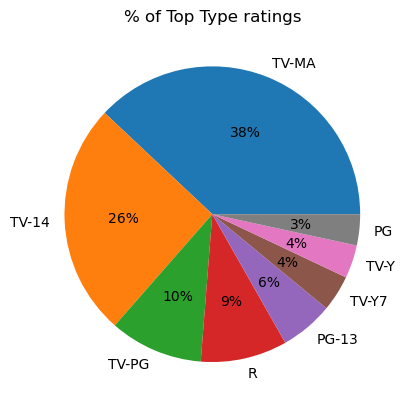

In [27]:
#top type ratings
plt.pie(ratings['count'][:8],labels = ratings['rating'][:8],autopct ='%.0f%%')
plt.title('% of Top Type ratings')

In [28]:
#top 10 countries with most content nerflix
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count',ascending = False)[:10]


In [29]:
top_ten_countries

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


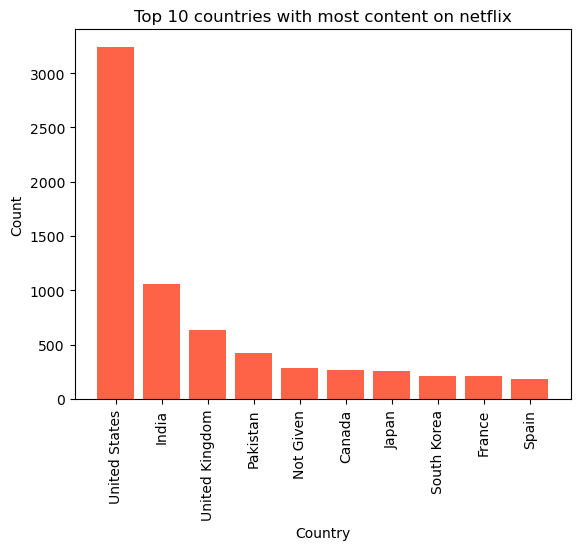

In [30]:
plt.bar(top_ten_countries['country'],top_ten_countries['count'],color ='#FF6347')
plt.xticks(rotation =90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 countries with most content on netflix')
plt.show()

In [31]:
#yearly and monthly releses ofTV shows and movies
monthly_movie_release = data[data['type']=='Movie']['month'].value_counts().reset_index().sort_values(by='count',ascending = False)
monthly_tv_release = data[data['type']=='TV Show']['month'].value_counts().reset_index().sort_values(by='count',ascending=False)

In [32]:
monthly_movie_release

,month,count
0,July,565
1,April,549
2,December,547
3,October,545
4,January,545
5,March,528
6,September,518
7,August,518
8,November,498
9,June,492


In [33]:
monthly_tv_release

,month,count
0,December,265
1,July,262
2,September,251
3,June,236
4,August,236
5,October,215
6,April,214
7,March,213
8,November,207
9,May,193


C:\Users\DELL\AppData\Local\Temp\ipykernel_15288\531143261.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month",y="count", data=monthly_movie_release,order=month_order, palette="coolwarm")


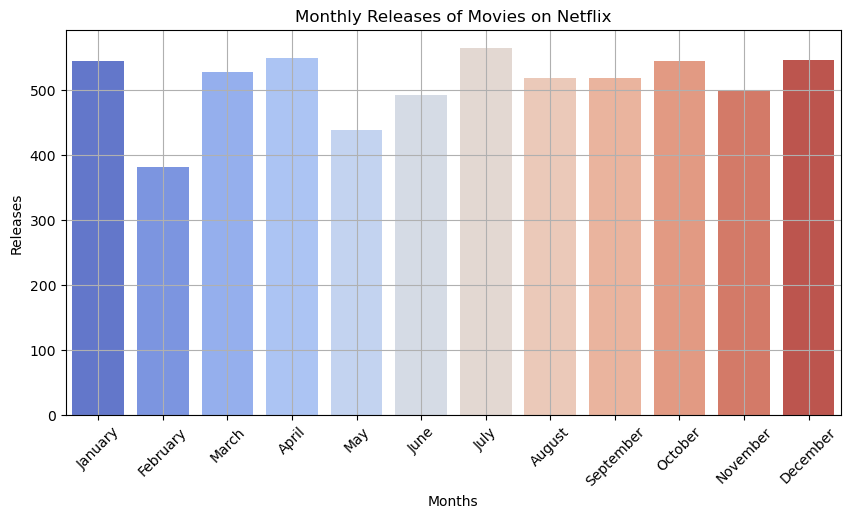

In [34]:

# Correct month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Create count plot
plt.figure(figsize=(10, 5))
sns.barplot(x="month",y="count", data=monthly_movie_release,order=month_order, palette="coolwarm")



plt.xlabel("Months")
plt.ylabel("Releases")
plt.title("Monthly Releases of Movies on Netflix")
plt.xticks(rotation=45)  # Rotate for better readability
plt.grid(True)  # Apply grid to improve readability

plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_15288\246909089.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month",y="count", data=monthly_tv_release, order=month_order,palette="coolwarm")


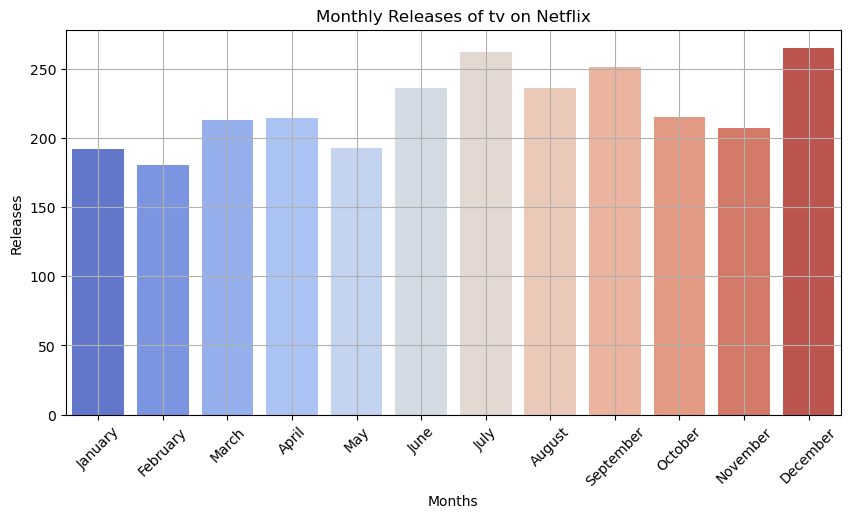

In [35]:

# Correct month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Create count plot
plt.figure(figsize=(10, 5))
sns.barplot(x="month",y="count", data=monthly_tv_release, order=month_order,palette="coolwarm")



plt.xlabel("Months")
plt.ylabel("Releases")
plt.title("Monthly Releases of tv on Netflix")
plt.xticks(rotation=45)  
plt.grid(True) 

plt.show()
